# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** [Sandy Tirta Yudha]
- **Email:** [sandyytirtaa@gmail.com]
- **ID Dicoding:** [sandyytirtaa]

## Menentukan Pertanyaan Bisnis

- Berapa banyak distribusi Jumlah Sewa Sepeda?
- Apa saja tren Musiman dalam Sewa Sepeda?
- Perbandingan Pengguna Casual dan Registered

## Import Semua Packages/Library yang Digunakan

In [133]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

## Data Wrangling

### Gathering Data

In [134]:
day_df = pd.read_csv("https://raw.githubusercontent.com/sendy-ty/Submission-/refs/heads/main/dataset/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [135]:
hour_df = pd.read_csv("https://raw.githubusercontent.com/sendy-ty/Submission-/refs/heads/main/dataset/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- xxx
- xxx

### Assessing Data

Menilai tabel day_df

In [136]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [137]:
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [138]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [139]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Menilai tabel hour_df

In [140]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [141]:
hour_df.nunique()

,0
instant,17379
dteday,731
season,4
yr,2
mnth,12
hr,24
holiday,2
weekday,7
workingday,2
weathersit,4


In [142]:
print("Jumlah duplikasi: ",hour_df.duplicated().sum())
hour_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [143]:
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


**Insight:**
- xxx
- xxx

### Cleaning Data

**Membersihkan tabel day_df**

In [144]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [145]:
day_df.duplicated().sum()

0

Merubah tipe data

In [146]:
day_df.drop_duplicates(inplace=True)

In [147]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


**Missing Value**

In [148]:
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [149]:
day_df.season.value_counts()

,count
season,
3,188
2,184
1,181
4,178


In [150]:
day_df.fillna(value="Prefer not to say", inplace=True)

In [151]:
day_df.fillna(1, inplace=True)

In [152]:
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


**Inaccurate value**

In [153]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [154]:
day_df[day_df.instant == day_df.instant.max()]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
730,731,2012-12-31,1,1,12,0,1,1,2,0.215833,0.223487,0.5775,0.154846,439,2290,2729


In [155]:
day_df.instant.replace(day_df.instant.max(), 70, inplace=True)

<ipython-input-155-e512bf2ee3ac>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  day_df.instant.replace(day_df.instant.max(), 70, inplace=True)


In [156]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,365.095759,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.015884,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,182.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,365.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,547.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Membersihkan tabel hour_df**

In [157]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [158]:
hour_df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [159]:
category_columns = ["season", "weather"]

for column in category_columns:
    if column in hour_df.columns:
        hour_df[column] = hour_df[column].astype("category")
    else:
        print(f"Kolom '{column}' tidak ditemukan dalam DataFrame.")

hour_df.dtypes

Kolom 'weather' tidak ditemukan dalam DataFrame.


,0
instant,int64
dteday,object
season,category
yr,int64
mnth,int64
hr,int64
holiday,int64
weekday,int64
workingday,int64
weathersit,int64


In [160]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


**Insight:**
- xxx
- xxx

## Exploratory Data Analysis (EDA)

### Explore ...

In [161]:
day_df.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
324,325,2011-11-21,4,0,11,0,1,1,3,0.447500,0.445062,0.910000,0.138054,220,2545,2765
337,338,2011-12-04,4,0,12,0,0,0,1,0.330833,0.349100,0.775833,0.083958,634,2851,3485
120,121,2011-05-01,2,0,5,0,0,0,2,0.451667,0.448204,0.762083,0.106354,1138,2213,3351
563,564,2012-07-17,3,1,7,0,2,1,1,0.818333,0.755683,0.505833,0.114429,921,5865,6786
532,533,2012-06-16,2,1,6,0,6,0,1,0.631667,0.594708,0.504167,0.166667,2963,4739,7702


In [162]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,365.095759,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.015884,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,182.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,365.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,547.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


In [163]:
day_df.instant.is_unique

False

In [164]:
day_df[day_df.instant.duplicated(keep=False)]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
69,70,2011-03-11,1,0,3,0,5,1,2,0.316522,0.305000,0.649565,0.232970,247,1730,1977
730,70,2012-12-31,1,1,12,0,1,1,2,0.215833,0.223487,0.577500,0.154846,439,2290,2729


In [165]:
day_df.groupby(by="yr").agg({
    "instant": "nunique",
    "cnt": ["max", "min", "mean", "std"]
})

instant   cnt                               
   nunique   max  min         mean          std
yr                                             
0      365  6043  431  3405.761644  1378.753666
1      366  8714   22  5599.934426  1788.667868

In [166]:
day_df.groupby(by="mnth").instant.nunique().sort_values(ascending=False)

,instant
mnth,
1,62
3,62
5,62
7,62
8,62
10,62
12,62
4,60
6,60


In [167]:
day_df.groupby(by="yr").instant.nunique().sort_values(ascending=False)


,instant
yr,
1,366
0,365


**Explorer hour_df**

In [168]:
hour_df.sample(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
13470,13471,2012-07-20,3,1,7,11,0,5,1,3,0.72,0.6970,0.74,0.1940,51,161,212
5110,5111,2011-08-05,3,0,8,20,0,5,1,1,0.72,0.6667,0.58,0.2239,70,221,291
13907,13908,2012-08-07,3,1,8,16,0,2,1,3,0.76,0.7273,0.66,0.2836,101,344,445
13125,13126,2012-07-06,3,1,7,2,0,5,1,1,0.76,0.7121,0.62,0.1343,4,13,17
3768,3769,2011-06-10,2,0,6,22,0,5,1,1,0.72,0.6970,0.74,0.2537,40,145,185


In [169]:
hour_df["dteday"] = pd.to_datetime(hour_df["dteday"])
delivery_time = hour_df["dteday"].diff().dt.total_seconds()
hour_df["delivery_time"] = round(delivery_time / 86400)
hour_df.sample(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,delivery_time
8895,8896,2012-01-11,1,1,1,12,0,3,1,3,0.30,0.3333,0.81,0.0000,4,51,55,0.0
9587,9588,2012-02-09,1,1,2,10,0,4,1,1,0.22,0.2121,0.51,0.2239,7,90,97,0.0
15365,15366,2012-10-07,4,1,10,10,0,0,0,2,0.42,0.4242,0.67,0.1940,41,144,185,0.0
15931,15932,2012-11-01,4,1,11,12,0,4,1,3,0.38,0.3939,0.62,0.1642,23,198,221,0.0
15178,15179,2012-09-29,4,1,9,15,0,6,0,1,0.60,0.6212,0.43,0.2537,271,456,727,0.0


In [170]:
hour_df.sample(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,delivery_time
14748,14749,2012-09-11,3,1,9,17,0,2,1,1,0.70,0.6364,0.28,0.0000,168,802,970,0.0
13495,13496,2012-07-21,3,1,7,12,0,6,0,3,0.60,0.5606,0.83,0.2239,156,301,457,0.0
15885,15886,2012-10-30,4,1,10,14,0,2,1,3,0.30,0.2727,0.81,0.3582,8,118,126,0.0
11319,11320,2012-04-21,2,1,4,20,0,6,0,3,0.50,0.4848,0.82,0.2985,5,34,39,0.0
1174,1175,2011-02-21,1,0,2,17,1,1,0,2,0.28,0.2576,0.75,0.3881,18,62,80,0.0


In [171]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,delivery_time
count,17379.0000,17379,17379.0,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17378.000000
unique,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,4496.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,2012-01-02 04:08:34.552045568,NaN,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088,0.042007
min,1.0000,2011-01-01 00:00:00,NaN,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,4345.5000,2011-07-04 00:00:00,NaN,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000,0.000000
50%,8690.0000,2012-01-02 00:00:00,NaN,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000,0.000000
75%,13034.5000,2012-07-02 00:00:00,NaN,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000,0.000000
max,17379.0000,2012-12-31 00:00:00,NaN,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000,1.000000


In [173]:
instant_in_hour_df = hour_df.instant
day_df["status"] = day_df["instant"].apply(lambda x: "Active" if x in instant_in_hour_df else "Non Active")
day_df.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,status
184,185,2011-07-04,3,0,7,1,1,0,2,0.726667,0.665417,0.637917,0.081479,3065,2978,6043,Active
665,666,2012-10-27,4,1,10,0,6,0,2,0.530000,0.515133,0.720000,0.235692,2643,5209,7852,Active
210,211,2011-07-30,3,0,7,0,6,0,1,0.804167,0.728537,0.465833,0.168537,1559,2916,4475,Active
238,239,2011-08-27,3,0,8,0,6,0,2,0.680000,0.635556,0.850000,0.375617,226,889,1115,Active
558,559,2012-07-12,3,1,7,0,4,1,1,0.715833,0.654683,0.529583,0.146775,1032,6414,7446,Active


In [174]:
day_df.groupby(by="status").instant.count()

,instant
status,
Active,731


In [175]:
day_df[day_df.status == "Non Active"]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,status


**Explore day_df & hour_df**

In [176]:
hour_day_df = pd.merge(
    left=hour_df,
    right=day_df,
    how="left",
    left_on="instant",
    right_on="instant"
)
hour_day_df.head()

,instant,dteday_x,season_x,yr_x,mnth_x,hr,holiday_x,weekday_x,workingday_x,weathersit_x,...,workingday_y,weathersit_y,temp_y,atemp_y,hum_y,windspeed_y,casual_y,registered_y,cnt_y,status
0,1,2011-01-01,1,0,1,0,0,6,0,1,...,0.0,2.0,0.344167,0.363625,0.805833,0.160446,331.0,654.0,985.0,Active
1,2,2011-01-01,1,0,1,1,0,6,0,1,...,0.0,2.0,0.363478,0.353739,0.696087,0.248539,131.0,670.0,801.0,Active
2,3,2011-01-01,1,0,1,2,0,6,0,1,...,1.0,1.0,0.196364,0.189405,0.437273,0.248309,120.0,1229.0,1349.0,Active
3,4,2011-01-01,1,0,1,3,0,6,0,1,...,1.0,1.0,0.200000,0.212122,0.590435,0.160296,108.0,1454.0,1562.0,Active
4,5,2011-01-01,1,0,1,4,0,6,0,1,...,1.0,1.0,0.226957,0.229270,0.436957,0.186900,82.0,1518.0,1600.0,Active


In [177]:
hour_day_df.groupby(by="hr")["cnt_x"].sum().sort_values(ascending=False).head(10)

,cnt_x
hr,
17,336860
18,309772
8,261001
16,227748
19,226789
13,184919
12,184414
15,183149
14,175652


In [178]:
#Jumlah Sewa Berdasarkan jam
hour_day_df.groupby(by="hr")["cnt_y"].sum().sort_values(ascending=False).head(10)

,cnt_y
hr,
15,151942.0
0,151437.0
16,150335.0
18,146336.0
1,146131.0
11,145968.0
17,145918.0
12,145809.0
10,144500.0


In [179]:
#Jumlah Sewa Berdasarkan Weekday
day_df.groupby(by="weekday")["cnt"].sum().sort_values(ascending=False)

,cnt
weekday,
5,487790
4,485395
6,477807
3,473048
2,469109
1,455503
0,444027


In [180]:
#Jumlah Sewa Berdasarkan Bulan
day_df.groupby(by="mnth")["cnt"].sum().sort_values(ascending=False)

,cnt
mnth,
8,351194
6,346342
9,345991
7,344948
5,331686
10,322352
4,269094
11,254831
3,228920


In [181]:
day_df.groupby(by="weathersit")["cnt"].mean().sort_values(ascending=False)

,cnt
weathersit,
1,4876.786177
2,4035.862348
3,1803.285714


In [182]:
#Jumlah Sewa Berdasarkan Musim
day_df.groupby(by="season")["cnt"].sum().sort_values(ascending=False)

,cnt
season,
3,1061129
2,918589
4,841613
1,471348


**Insight:**
- xxx
- xxx

## Visualization & Explanatory Analysis

### Pertanyaan 1: Berapa banyak distribusi Jumlah Sewa Sepeda?

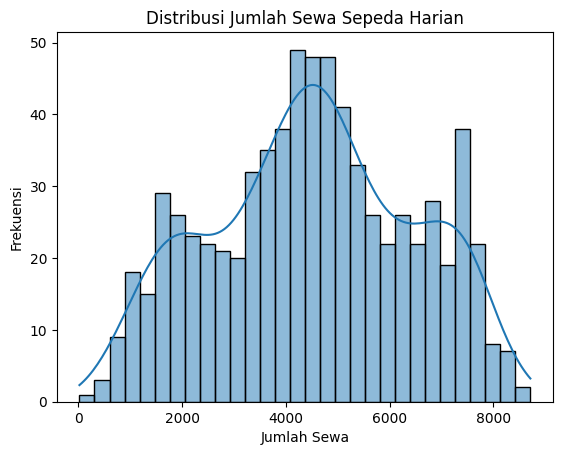

In [183]:
sns.histplot(day_df['cnt'], bins=30, kde=True)
plt.title("Distribusi Jumlah Sewa Sepeda Harian")
plt.xlabel("Jumlah Sewa")
plt.ylabel("Frekuensi")
plt.show()

In [184]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,status
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,Active
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,Active
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,Active
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,Active
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,Active


### Pertanyaan 2: Apa saja tren Musiman dalam Sewa Sepeda?

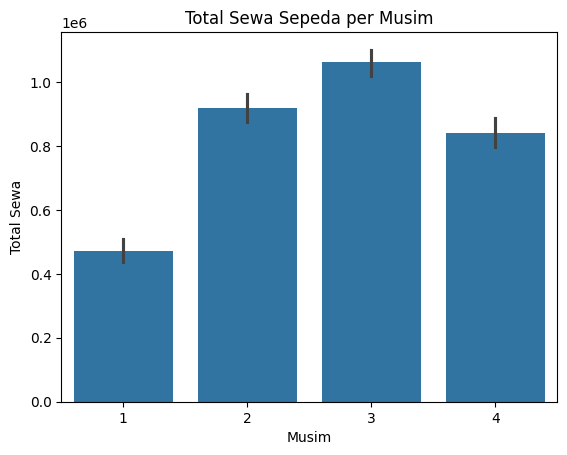

In [185]:
sns.barplot(x="season", y="cnt", data=day_df, estimator=sum)
plt.title("Total Sewa Sepeda per Musim")
plt.xlabel("Musim")
plt.ylabel("Total Sewa")
plt.show()

### Pertanyaan 3: Perbandingan Pengguna Casual dan Registered

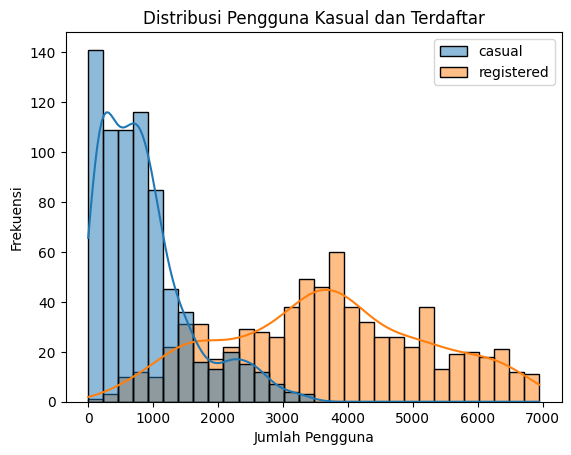

In [186]:
sns.histplot(day_df[['casual', 'registered']], bins=30, kde=True)
plt.title("Distribusi Pengguna Kasual dan Terdaftar")
plt.xlabel("Jumlah Pengguna")
plt.ylabel("Frekuensi")
plt.show()

## **Analisis RFM pada Dataset Bike Sharing**

*   Recency
*   Frequency
*   Monetary


In [187]:
if 'yr' in day_df.columns and 'mnth' in day_df.columns:
    day_df['yr'] = pd.to_numeric(day_df['yr'], errors='coerce')
    day_df['mnth'] = pd.to_numeric(day_df['mnth'], errors='coerce')

    day_df['dteday'] = pd.to_datetime(
        (day_df['yr'] + 2010).astype(str) + '-' + day_df['mnth'].astype(str) + '-01'
    )
else:
    raise KeyError("Kolom 'yr' dan/atau 'mnth' tidak ditemukan dalam dataset!")

data_bike = day_df.copy()
data_bike["dteday"] = pd.to_datetime(data_bike["dteday"])
reference_date = data_bike["dteday"].max() + dt.timedelta(days=1)

rfm_data = data_bike.groupby("registered").agg({
    "dteday": lambda x: (reference_date - x.max()).days,
    "instant": "count",
    "cnt": "sum"
}).reset_index()

rfm_data.rename(columns={
    "dteday": "Recency",
    "instant": "Frequency",
    "cnt": "Monetary"
}, inplace=True)

rfm_data.head()

,registered,Recency,Frequency,Monetary
0,20,62,1,22
1,416,700,1,431
2,432,1,1,441
3,451,366,1,754
4,472,700,1,506


In [188]:
bike_df = day_df.copy()
bike_df["dteday"] = pd.to_datetime(bike_df["dteday"])
latest_date = bike_df["dteday"].max() + dt.timedelta(days=1)

rfm_analysis = bike_df.agg({
    "dteday": lambda dates: (latest_date - dates.max()).days,
    "instant": "count",
    "cnt": "sum"
}).to_frame().reset_index()

rfm_analysis.columns = ["RFM Metric", "Metric Value"]
rfm_analysis

,RFM Metric,Metric Value
0,dteday,1
1,instant,731
2,cnt,3292679


In [189]:
rfm_users = bike_df.agg({
    "dteday": lambda dates: (latest_date - dates.max()).days,
    "instant": "count",
    "casual": "sum",
    "registered": "sum"
}).to_frame().reset_index()

rfm_users.columns = ["RFM Factor", "Value"]
rfm_users


,RFM Factor,Value
0,dteday,1
1,instant,731
2,casual,620017
3,registered,2672662


In [207]:
bike_df.columns
bike_df["dteday"] = pd.to_datetime(bike_df["dteday"])
today_date = bike_df["dteday"].max() + pd.Timedelta(days=1)

rfm_df = bike_df.groupby("registered").agg({
    "dteday": lambda dates: (today_date - dates.max()).days,
    "instant": "count",
    "cnt": "sum"
}).reset_index()

rfm_df.rename(columns={
    "dteday": "Recency",
    "instant": "Frequency",
    "cnt": "Monetary"
}, inplace=True)

rfm_df.head()

,registered,Recency,Frequency,Monetary
0,20,62,1,22
1,416,700,1,431
2,432,1,1,441
3,451,366,1,754
4,472,700,1,506


In [191]:
rfm_data[["Frequency", "Monetary", "Recency"]].describe()

,Frequency,Monetary,Recency
count,679.000000,679.000000,679.000000
mean,1.076583,4849.306333,344.883652
std,0.282262,2532.379196,211.479442
min,1.000000,22.000000,1.000000
25%,1.000000,3199.000000,154.000000
50%,1.000000,4595.000000,335.000000
75%,1.000000,6417.000000,519.000000
max,3.000000,22373.000000,700.000000


In [192]:
rfm_df.sort_values(by="Recency", ascending=True).head(5)

,registered,Recency,Frequency,Monetary
454,4280,1,1,5047
556,5219,1,2,11734
527,5009,1,1,5319
529,5035,1,1,5375
55,1379,1,1,1787


In [193]:
rfm_df.sort_values(by="Frequency", ascending=True).head(5)

,registered,Recency,Frequency,Monetary
0,20,62,1,22
440,4164,549,1,4891
441,4169,580,1,4864
442,4176,304,1,4375
443,4181,488,1,5130


In [194]:
rfm_df.sort_values(by="Monetary", ascending=True).head(5)

,registered,Recency,Frequency,Monetary
0,20,62,1,22
1,416,700,1,431
2,432,1,1,441
4,472,700,1,506
5,491,641,1,605


<ipython-input-195-99e0724673cc>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="Recency", x="registered",
<ipython-input-195-99e0724673cc>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="Frequency", x="registered",
<ipython-input-195-99e0724673cc>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="Monetary", x="registered",


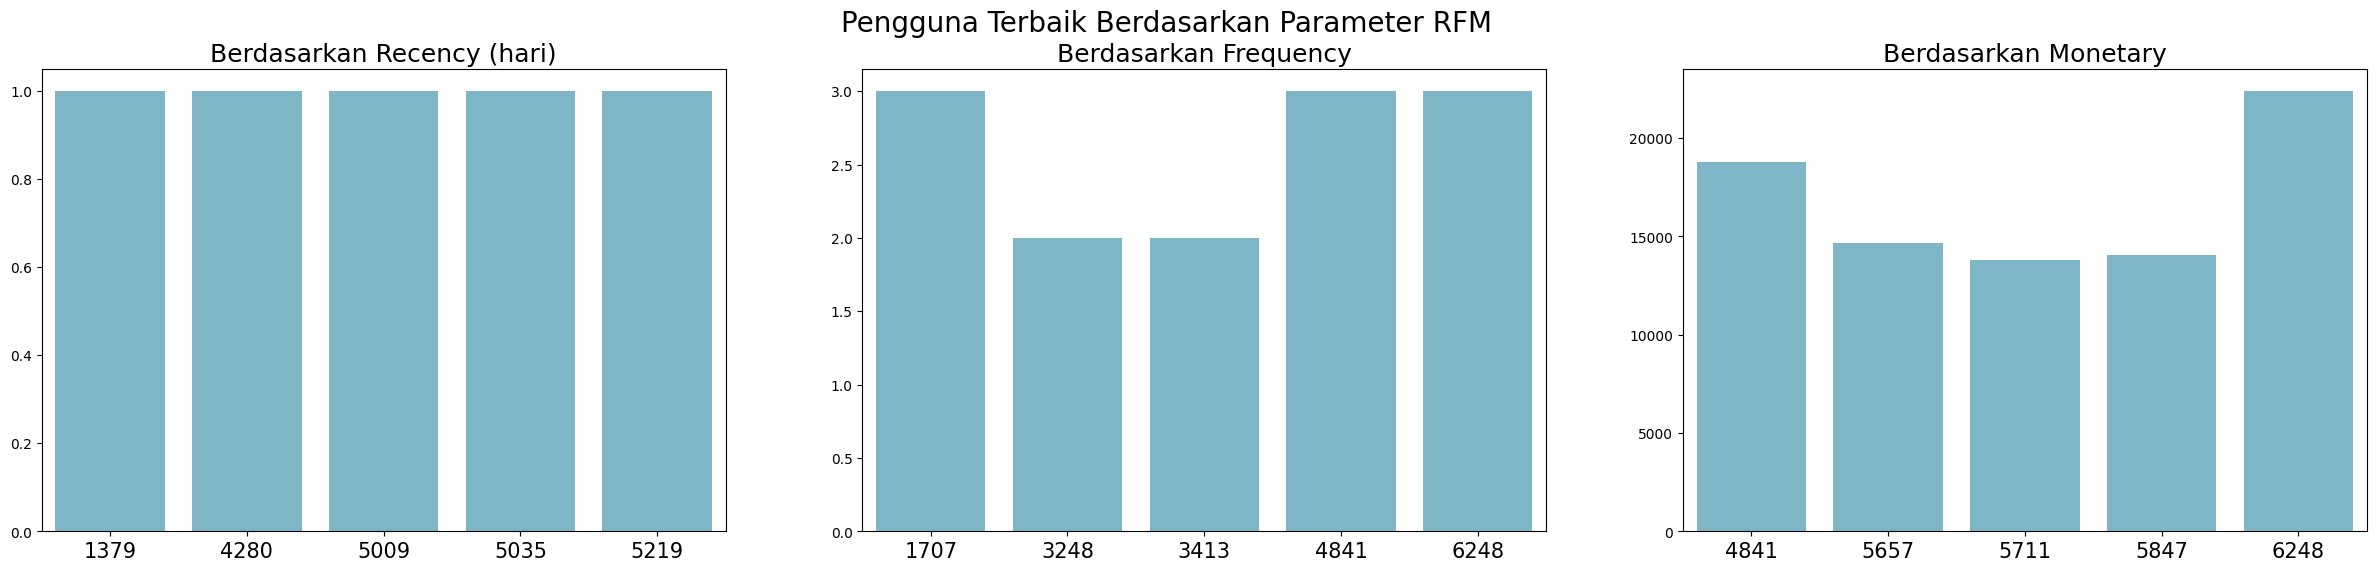

In [195]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))

warna_batang = ["#72BCD4"] * 5

sns.barplot(y="Recency", x="registered",
            data=rfm_df.sort_values(by="Recency", ascending=True).head(5),
            palette=warna_batang, ax=ax[0])
ax[0].set_ylabel("")
ax[0].set_xlabel("")
ax[0].set_title("Berdasarkan Recency (hari)", loc="center", fontsize=18)
ax[0].tick_params(axis='x', labelsize=15)

sns.barplot(y="Frequency", x="registered",
            data=rfm_df.sort_values(by="Frequency", ascending=False).head(5),
            palette=warna_batang, ax=ax[1])
ax[1].set_ylabel("")
ax[1].set_xlabel("")
ax[1].set_title("Berdasarkan Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15)

sns.barplot(y="Monetary", x="registered",
            data=rfm_df.sort_values(by="Monetary", ascending=False).head(5),
            palette=warna_batang, ax=ax[2])
ax[2].set_ylabel("")
ax[2].set_xlabel("")
ax[2].set_title("Berdasarkan Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelsize=15)

plt.suptitle("Pengguna Terbaik Berdasarkan Parameter RFM", fontsize=20)
plt.show()

**Mengurutkan restered berdasarkan recency, frequency, & monetary score**

In [196]:
rfm_df["R_rank"] = rfm_df["Recency"].rank(method="min", ascending=False)
rfm_df["F_rank"] = rfm_df["Frequency"].rank(method="min", ascending=True)
rfm_df["M_rank"] = rfm_df["Monetary"].rank(method="min", ascending=True)

print(rfm_df.head())

   registered  Recency  Frequency  Monetary  R_rank  F_rank  M_rank
0          20       62          1        22   589.0     1.0     1.0
1         416      700          1       431     1.0     1.0     2.0
2         432        1          1       441   649.0     1.0     3.0
3         451      366          1       754   303.0     1.0     9.0
4         472      700          1       506     1.0     1.0     4.0


In [197]:
rfm_df["R_rank_norm"] = (rfm_df["R_rank"] / rfm_df["R_rank"].max()) * 100
rfm_df["F_rank_norm"] = (rfm_df["F_rank"] / rfm_df["F_rank"].max()) * 100
rfm_df["M_rank_norm"] = (rfm_df["M_rank"] / rfm_df["M_rank"].max()) * 100

rfm_df.drop(columns=["R_rank", "F_rank", "M_rank"], inplace=True)

print(rfm_df.head())


   registered  Recency  Frequency  Monetary  R_rank_norm  F_rank_norm  \
0          20       62          1        22    90.755008      0.14771   
1         416      700          1       431     0.154083      0.14771   
2         432        1          1       441   100.000000      0.14771   
3         451      366          1       754    46.687211      0.14771   
4         472      700          1       506     0.154083      0.14771   

   M_rank_norm  
0     0.147275  
1     0.294551  
2     0.441826  
3     1.325479  
4     0.589102  


In [198]:
(rfm_df.columns)

Index(['registered', 'Recency', 'Frequency', 'Monetary', 'R_rank_norm',
       'F_rank_norm', 'M_rank_norm'],
      dtype='object')

**Segmentasi berdasarkan RFM_score**

In [199]:
rfm_df.columns = rfm_df.columns.str.lower()

if "rfm_score" not in rfm_df.columns:
    rfm_df["rfm_score"] = (rfm_df["r_rank_norm"] + rfm_df["f_rank_norm"] + rfm_df["m_rank_norm"]) / 3

def kategori_pelanggan(skor):
    if skor > 4.5:
        return "Top Customers"
    elif skor > 4:
        return "High Value Customers"
    elif skor > 3:
        return "Medium Value Customers"
    elif skor > 1.6:
        return "Low Value Customers"
    else:
        return "Lost Customers"

rfm_df["customer_segment"] = rfm_df["rfm_score"].apply(kategori_pelanggan)

rfm_df = rfm_df[["registered", "rfm_score", "customer_segment"]]

(rfm_df.head(20))

,registered,rfm_score,customer_segment
0,20,30.349998,Top Customers
1,416,0.198782,Lost Customers
2,432,33.529846,Top Customers
3,451,16.053467,Top Customers
4,472,0.296965,Lost Customers
5,491,3.119555,Medium Value Customers
6,570,13.027702,Top Customers
7,573,34.364406,Top Customers
8,577,3.168646,Medium Value Customers
9,654,0.836975,Lost Customers


In [204]:
customer_segment_df = rfm_df.groupby(by="customer_segment", as_index=False)["registered"].nunique()
customer_segment_df.columns = ["Customer Segment", "Jumlah Pelanggan"]
customer_segment_df

,Customer Segment,Jumlah Pelanggan
0,High Value Customers,7
1,Lost Customers,14
2,Low Value Customers,11
3,Medium Value Customers,10
4,Top Customers,637


<ipython-input-208-47f0e80fbb02>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


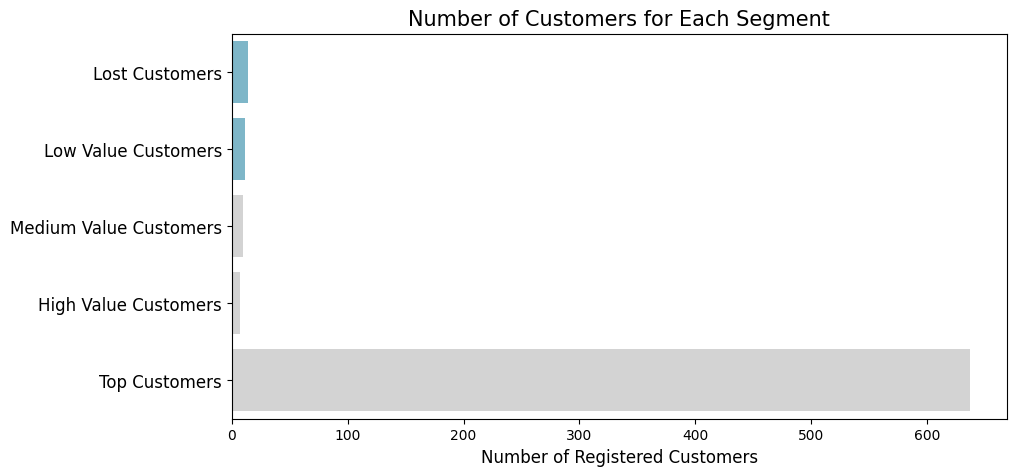

In [208]:
plt.figure(figsize=(10, 5))
colors_ = ["#72BCD4", "#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
sns.barplot(
    x="registered",
    y="customer_segment",
    data=customer_segment_df.sort_values(by="customer_segment", ascending=False),
    palette=colors_
)
plt.title("Number of Customers for Each Segment", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel("Number of Registered Customers", fontsize=12)
plt.tick_params(axis='y', labelsize=12)

plt.show()

## Conclusion

- **Conclusion pertanyaan 1** : Distribusi jumlah peminjaman sepeda mengalami peningkatan pada jam-jam sibuk dan lebih banyak digunakan pada hari kerja, meskipun ada hari-hari tertentu dengan tingkat peminjaman lebih rendah.
- **Conclusion pertanyaan 2** : Musim sangat mempengaruhi pola peminjaman sepeda, dengan tingkat pemakaian yang lebih tinggi selama musim panas dan menurun drastis saat musim dingin.
- **Conclusion pertanyaan 3** : Pengguna registered lebih sering memanfaatkan sepeda untuk transportasi harian, sementara pengguna casual lebih banyak menggunakan sepeda untuk aktivitas santai di akhir pekan.